In [1]:
import re 
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from nltk.corpus import stopwords
from collections import Counter
from PIL import Image
from nltk.stem.wordnet import WordNetLemmatizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette


import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [95]:
df = pd.read_csv('CSV_Final_positive_la.csv')

## NLTK Stop words

In [99]:

stop_words = stopwords.words('english')

#stop_words.extend([])

In [100]:
type(stop_words)

list

## Vectorizing & Document Matrix

In [101]:
vectorizer = CountVectorizer(stop_words='english')

docs = vectorizer.fit_transform(df.comments)

features = vectorizer.get_feature_names()


In [102]:
vectorizer2 = CountVectorizer(stop_words='english')

docs2 = vectorizer2.fit_transform(df.comments)

features = vectorizer2.get_feature_names()

In [103]:

tf = TfidfVectorizer(stop_words=stopwords, min_df = 2, max_df=0.7)

docs_tf = tf.fit_transform(df['comments'])

features = tf.get_feature_names()



"\ntf = TfidfVectorizer(stop_words=stopwords, min_df = 2, max_df=0.7)\n\ndocs = tf.fit_transform(df['comments'])\n\nfeatures = tf.get_feature_names()\n\n"

## Read samples of reviews

In [104]:
for sample in df['spacy_doc'].sample(5).values:
    print(sample)
    print()

<br/>I hope to stay here again while visiting L.A, and you'd only come back to places that you feel comfortable with.

Wow! We couldn't have asked for a better host or place. From the beginning, Alex was flexible with our arrival time and he communicated well with us throughout our stay. The check in process was very easy, and we appreciated having a later check out time (1pm compared to typical 10/11am). We never interacted with the homeowners in person, but they were always available through the app, while our space felt separate and private. <br/><br/>The AirBnB itself is AWESOME! We loved the tall ceilings, renovated bathroom, cute details, and abundant amenities. It is in a more rural area, and we loved the proximity to walking trails, state parks, and gorgeous views. We did have a rental car, which was helpful... there aren't many nearby restaurants or shops. <br/><br/>We honestly were gushing over the place during our entire stay and hope we can visit again soon.

This Airbnb is

In [105]:
for sample in df['comments'].sample(5).values:
    print(sample)
    print()

We had a great stay at Elle and Adrian's. The apartment looks slightly different in real life than in the photos but was still nice and very spacious. Since the photos, floorboards have replaced the carpet. The appliances (washer, dryer, stove etc) were fantastic though some parts of the kitchen weren't as well-equipped e.g we were short on glasses, mugs and spoons. The apartment was also quite dark, the bedrooms and living area had no ceiling lights, only lamps, though I imagine in Summer this wouldn't be an issue. Great location, 1 minute walk to the beach and 10 minute walk to the shops and restaurants on Abbot Kinney Boulevard. Even though it was so close to everything in Venice, it was on a lovely quiet alleyway. We met Elle when we arrived who was absolutely lovely and gave us great recommendations for supermarkets and restaurants which all turned out to be excellent. Adrian was also really helpful and communicative leading up to our stay. Overall this was a great place for our p

## Most Used Words

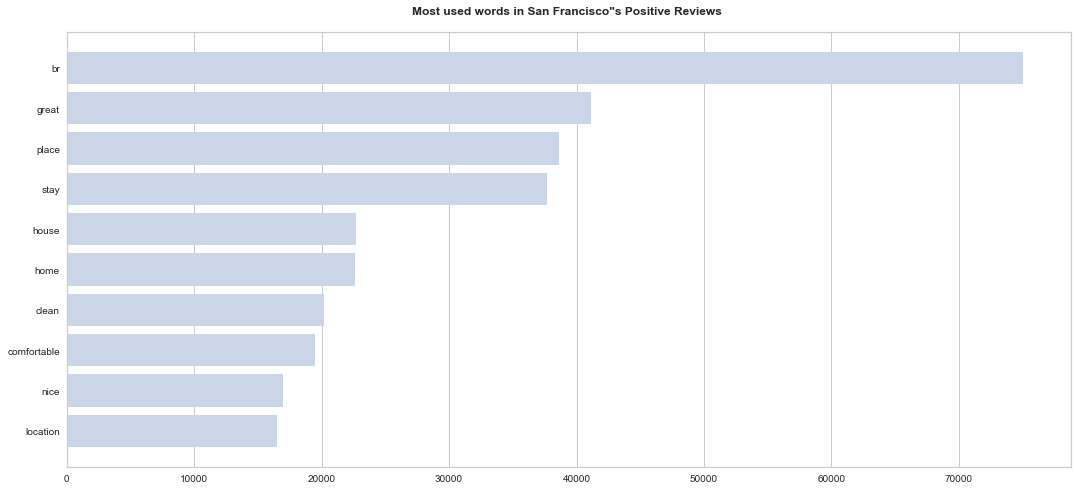

In [106]:
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('Most used words in San Francisco"s Positive Reviews \n', fontweight='bold')

##yellowbrick
vis = FreqDistVisualizer(features=features, n = 10)
vis.fit(docs)
vis.poof;

## Creating World Cloud words

In [107]:
def wordcloud_words(wordcloud):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(' San Francisco Negative Reviews\n', fontsize=18, fontweight='bold')
    plt.savefig('SFNegativeReviews')
    plt.show()

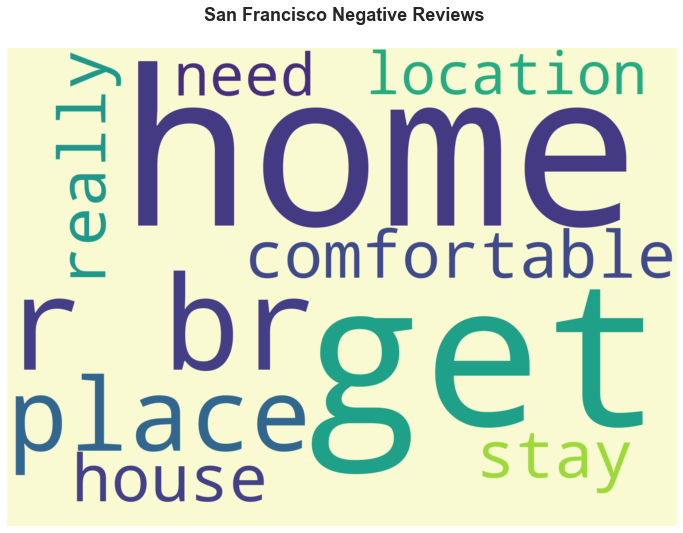

In [108]:
posWords = WordCloud(max_font_size=None, max_words = 10, background_color="lightgoldenrodyellow", 
                      width=3500, height=2500,
                      stopwords=stopwords.words('english')).generate(str(df.comments.values))

wordcloud_words(posWords)

## Simple Additional Cleaning

In [109]:
def clean(sents):
    for word in sents:
        word = re.sub('\s+', ' ', word)  
        word = re.sub("\'", "", word)  
        word = gensim.utils.simple_preprocess(str(word), deacc=True) 
        yield(word)  


# Apply cleaning

In [110]:
all_data = df.comments.values.tolist()
clean_sent = list(clean(all_data))
print(clean_sent[:1])

[['charles', 'place', 'will', 'not', 'disappoint', 'for', 'second', 'it', 'has', 'all', 'necessities', 'needed', 'to', 'have', 'comfortable', 'stay', 'as', 'person', 'that', 'is', 'sensitive', 'to', 'dust', 'really', 'appreciated', 'that', 'the', 'apartment', 'is', 'clean', 'and', 'has', 'good', 'ventilation', 'the', 'location', 'of', 'the', 'apartment', 'is', 'incredible', 'you', 'really', 'are', 'split', 'second', 'from', 'alot', 'of', 'happenings', 'really', 'enjoyed', 'my', 'stay', 'and', 'hope', 'to', 'be', 'back', 'very', 'soon', 'on', 'top', 'of', 'the', 'great', 'apartment', 'charles', 'as', 'host', 'is', 'truly', 'an', 'unicorn', 'very', 'good', 'at', 'communication', 'understanding', 'the', 'needs', 'of', 'the', 'guest', 'and', 'making', 'sure', 'the', 'stay', 'is', 'comfortable', 'truly', 'an', 'unique', 'experience']]


In [111]:
print(clean_sent[:5])

[['charles', 'place', 'will', 'not', 'disappoint', 'for', 'second', 'it', 'has', 'all', 'necessities', 'needed', 'to', 'have', 'comfortable', 'stay', 'as', 'person', 'that', 'is', 'sensitive', 'to', 'dust', 'really', 'appreciated', 'that', 'the', 'apartment', 'is', 'clean', 'and', 'has', 'good', 'ventilation', 'the', 'location', 'of', 'the', 'apartment', 'is', 'incredible', 'you', 'really', 'are', 'split', 'second', 'from', 'alot', 'of', 'happenings', 'really', 'enjoyed', 'my', 'stay', 'and', 'hope', 'to', 'be', 'back', 'very', 'soon', 'on', 'top', 'of', 'the', 'great', 'apartment', 'charles', 'as', 'host', 'is', 'truly', 'an', 'unicorn', 'very', 'good', 'at', 'communication', 'understanding', 'the', 'needs', 'of', 'the', 'guest', 'and', 'making', 'sure', 'the', 'stay', 'is', 'comfortable', 'truly', 'an', 'unique', 'experience'], ['louise', 'diana', 'was', 'kind', 'and', 'accommodating', 'shell', 'be', 'there', 'when', 'you', 'arrive', 'introduce', 'the', 'neighborhood', 'and', 'make',

## Bigram & Trigram

In [112]:

bi_gram = gensim.models.Phrases(clean_sent, min_count=5, threshold=100) 

tri_gram = gensim.models.Phrases(bi_gram[clean_sent], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bi_gram)

trigram_mod = gensim.models.phrases.Phraser(tri_gram)

## Clean, Remove & Lemma

In [113]:

def cleaning(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
       
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    
    nlp = spacy.load("en_core_web_sm")
    
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])     
    
    clean_text = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    
    return clean_text


## Apply final cleaning on prev cleaned list

In [114]:
doc_clean = cleaning(clean_sent)
doc_clean[:5]

[['disappoint',
  'second',
  'necessity',
  'need',
  'comfortable',
  'stay',
  'person',
  'sensitive',
  'dust',
  'really',
  'appreciate',
  'apartment',
  'clean',
  'good',
  'ventilation',
  'location',
  'apartment',
  'incredible',
  'really',
  'split',
  'second',
  'alot',
  'happening',
  'really',
  'enjoy',
  'stay',
  'hope',
  'back',
  'soon',
  'top',
  'great',
  'apartment',
  'host',
  'truly',
  'unicorn',
  'good',
  'communication',
  'understanding',
  'need',
  'guest',
  'make',
  'sure',
  'stay',
  'comfortable',
  'truly',
  'unique',
  'experience'],
 ['kind',
  'accommodate',
  'shell',
  'arrive',
  'introduce',
  'neighborhood',
  'make',
  'sure',
  'settle',
  'nicely',
  'lucky',
  'even',
  'get',
  'explore',
  'city',
  'well',
  'connected',
  'downstairs',
  'great',
  'natural_lighte',
  'spacious',
  'comfortable',
  'want',
  'get',
  'sunrise',
  'love',
  'place',
  'importantly',
  'quaint',
  'little',
  'townhouse',
  'prime',
  'loc

## Create Dictionary & Corpus

In [115]:
doc_dict = corpora.Dictionary(doc_clean)

corpus = [doc_dict.doc2bow(text) for text in doc_clean]


## Build The LDA model

In [116]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=doc_dict,num_topics=8, random_state=33,
                                           update_every=1,chunksize=15,passes=10,alpha='symmetric',iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.082*"beautiful" + 0.064*"wonderful" + 0.062*"private" + 0.049*"airbnb" + '
  '0.044*"cute" + 0.040*"touch" + 0.029*"far" + 0.027*"go" + 0.024*"lot" + '
  '0.024*"thoughtful"'),
 (1,
  '0.072*"beautiful" + 0.041*"property" + 0.031*"wonderful" + 0.018*"city" + '
  '0.018*"design" + 0.018*"mountain" + 0.015*"hike" + 0.014*"completely" + '
  '0.014*"road" + 0.013*"unique"'),
 (2,
  '0.047*"much" + 0.038*"go" + 0.031*"exactly" + 0.030*"beautiful" + '
  '0.028*"mention" + 0.018*"message" + 0.017*"hospitality" + 0.016*"review" + '
  '0.016*"greet" + 0.016*"malibu"'),
 (3,
  '0.065*"highly" + 0.049*"always" + 0.039*"patio" + 0.038*"towel" + '
  '0.036*"kitchen" + 0.030*"outdoor" + 0.027*"part" + 0.025*"equip" + '
  '0.020*"fresh" + 0.019*"block"'),
 (4,
  '0.088*"use" + 0.068*"unit" + 0.063*"helpful" + 0.054*"responsive" + '
  '0.044*"living" + 0.022*"door" + 0.022*"photo" + 0.020*"show" + '
  '0.020*"secure" + 0.018*"garage"'),
 (5,
  '0.050*"br" + 0.024*"room" + 0.018*"kitchen" + 0

## List of words by topic

In [117]:
topics = lda_model.show_topics(formatted=False)

In [118]:
type(topics)

list

In [119]:
topics

[(0,
  [('beautiful', 0.08214671),
   ('wonderful', 0.06377684),
   ('private', 0.062434763),
   ('airbnb', 0.049434967),
   ('cute', 0.04400213),
   ('touch', 0.040202748),
   ('far', 0.028657408),
   ('go', 0.027404081),
   ('lot', 0.023977585),
   ('thoughtful', 0.023503894)]),
 (1,
  [('beautiful', 0.07199651),
   ('property', 0.040682614),
   ('wonderful', 0.03140436),
   ('city', 0.018281462),
   ('design', 0.018089673),
   ('mountain', 0.017917277),
   ('hike', 0.015277325),
   ('completely', 0.014309768),
   ('road', 0.01423741),
   ('unique', 0.012512741)]),
 (2,
  [('much', 0.047495283),
   ('go', 0.038417757),
   ('exactly', 0.030794209),
   ('beautiful', 0.030192073),
   ('mention', 0.027748894),
   ('message', 0.018262599),
   ('hospitality', 0.017053874),
   ('review', 0.015799254),
   ('greet', 0.015779363),
   ('malibu', 0.015500144)]),
 (3,
  [('highly', 0.06496037),
   ('always', 0.049451083),
   ('patio', 0.03917404),
   ('towel', 0.037585303),
   ('kitchen', 0.03616

## Visualize the words By Topic

In [120]:
#topics = lda_model.show_topics(formatted=False)

In [121]:
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

In [122]:
words_tops = []

for i, topic in topics:
    for word, weight in topic:
        words_tops.append([word, i , weight, counter[word]])
        

df_f = pd.DataFrame(words_tops, columns=['word', 'topic_n', 'most_appear', 'word_count']) 

In [123]:
df_f.sort_values('most_appear', ascending=False).head(12)

,word,topic_n,most_appear,word_count
40,use,4,0.088204,7619
0,beautiful,0,0.082147,14756
10,beautiful,1,0.071997,14756
41,unit,4,0.068487,2998
30,highly,3,0.064960,6774
1,wonderful,0,0.063777,9844
42,helpful,4,0.063131,5781
2,private,0,0.062435,6298
43,responsive,4,0.053702,3585
50,br,5,0.050232,27375


## Word Count as Weights by Topic Visualization

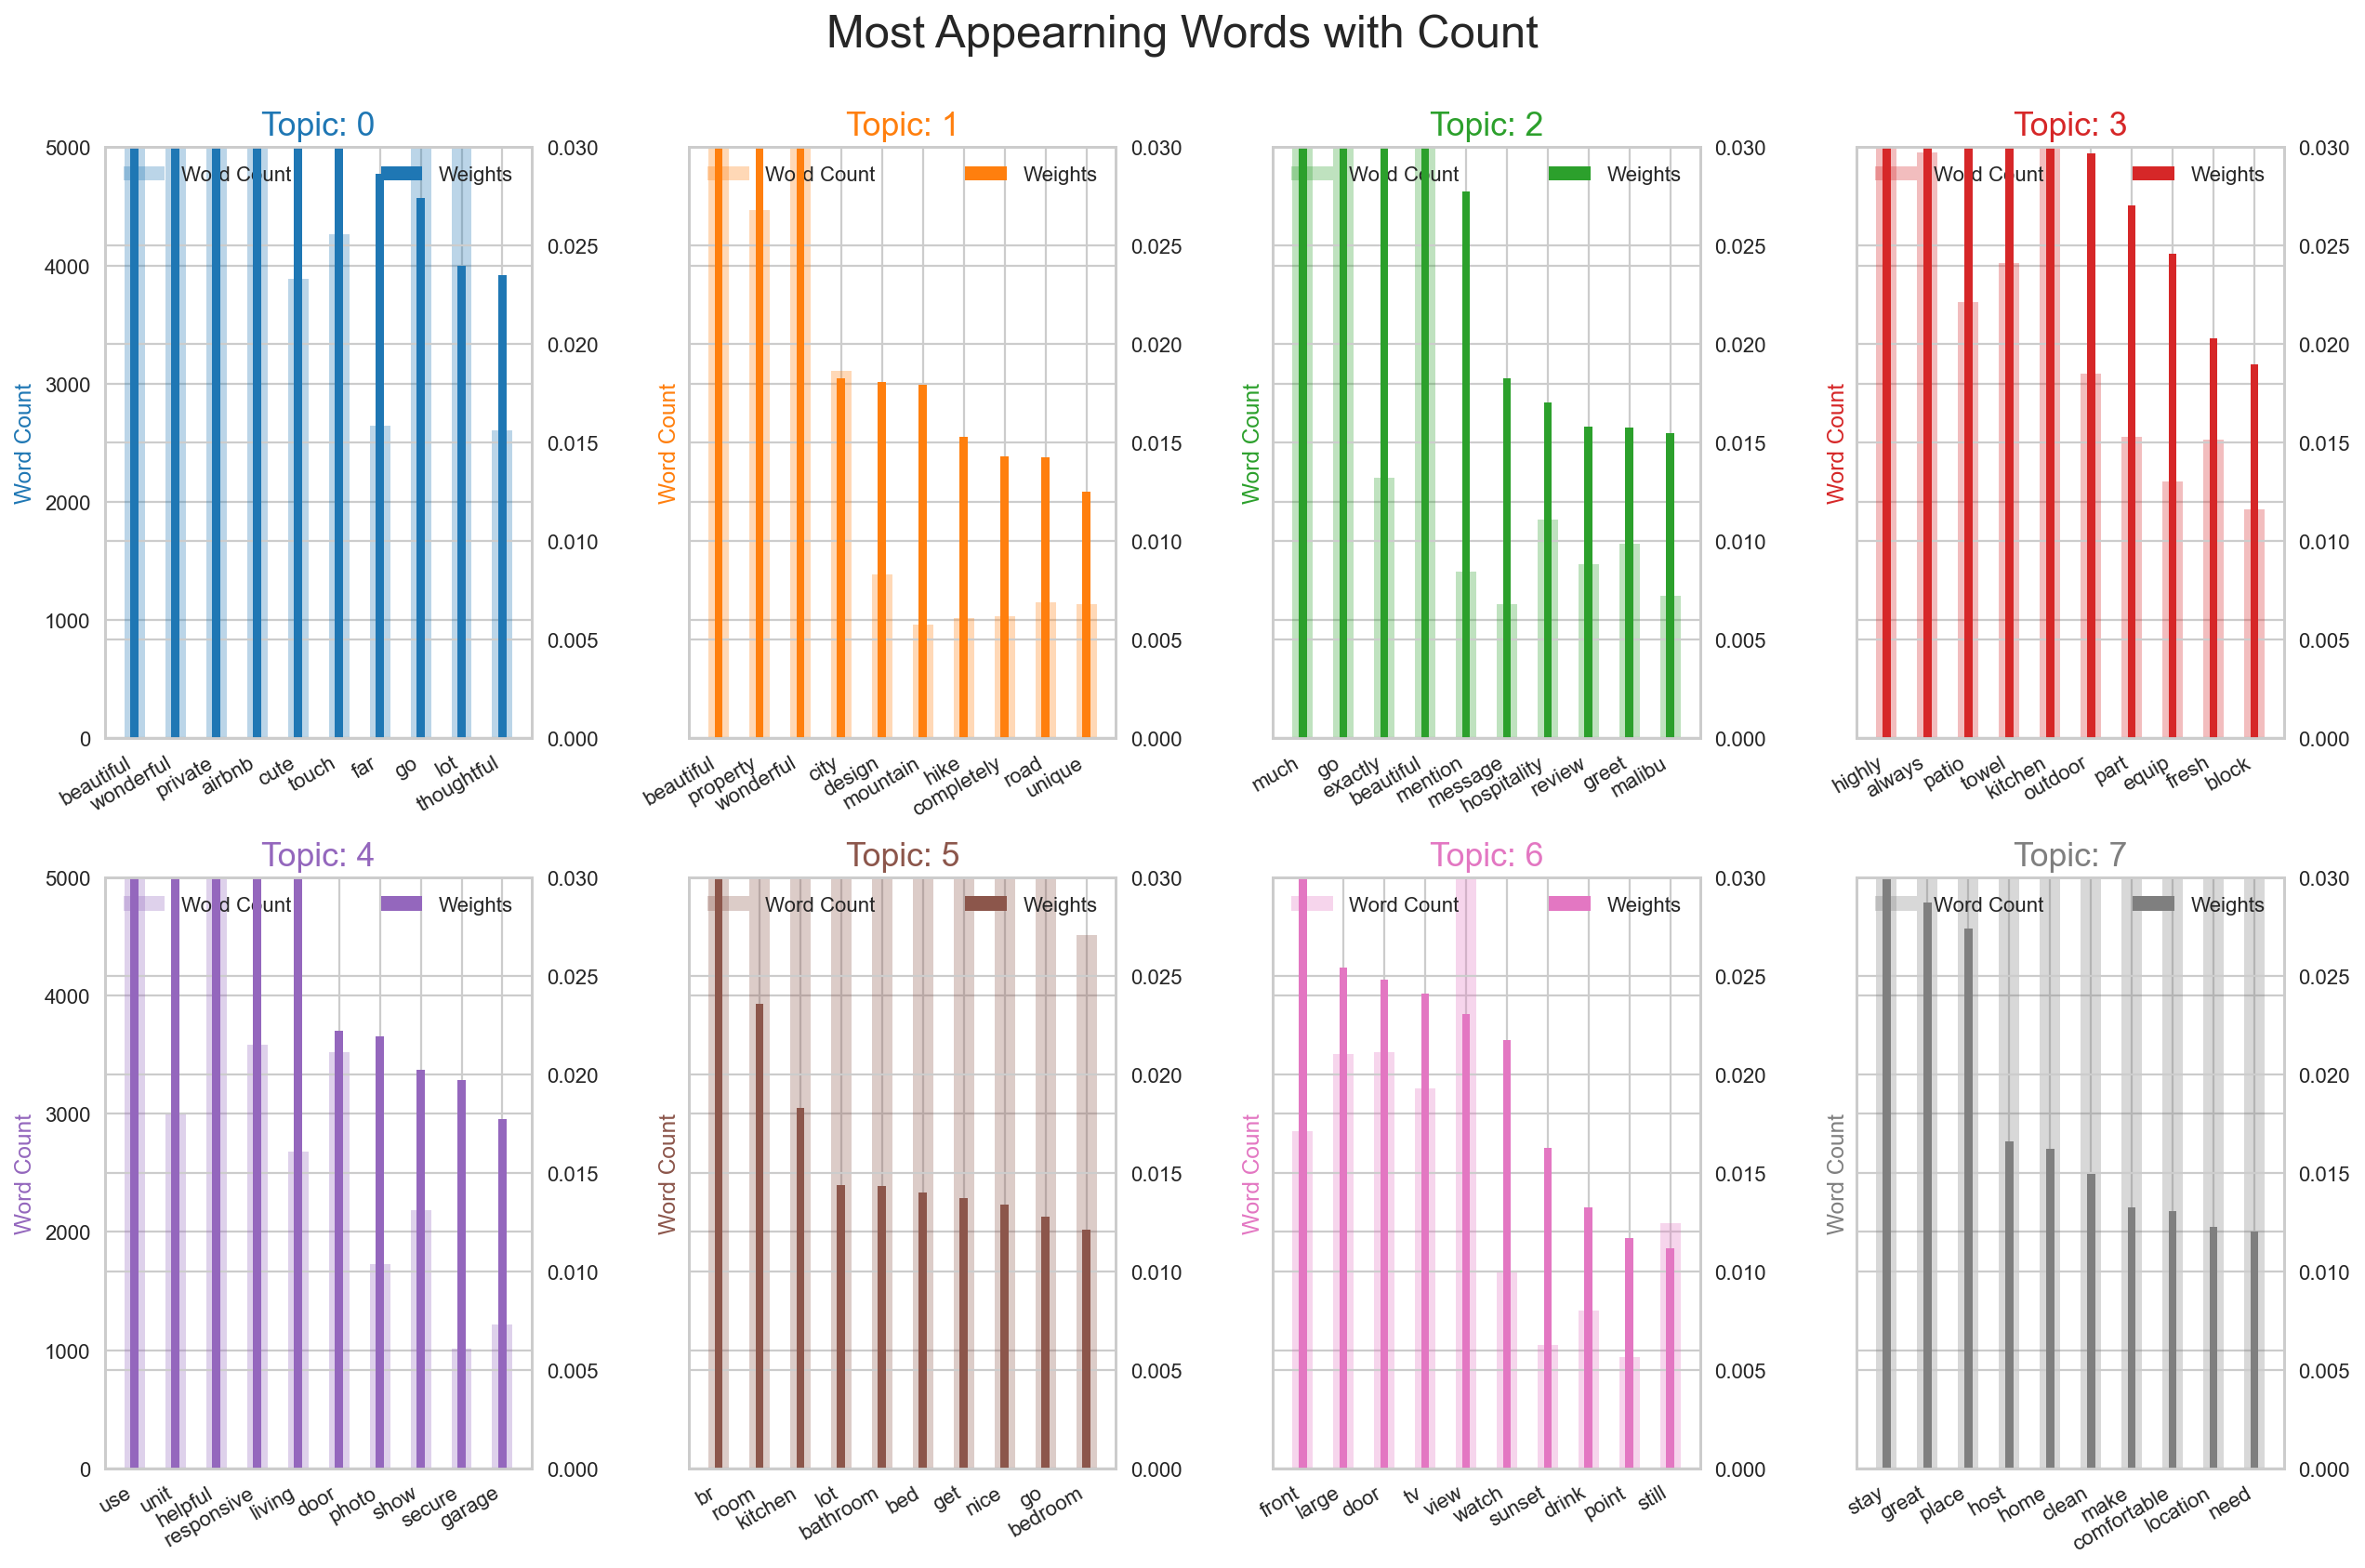

In [124]:
fig, axes = plt.subplots(2, 4, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data = df_f.loc[df_f.topic_n==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    
    ax_twin.bar(x='word', height="most_appear", data = df_f.loc[df_f.topic_n==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 5000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    
    ax.set_xticklabels(df_f.loc[df_f.topic_n==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Most Appearning Words with Count', fontsize=22, y=1.05)   

plt.show()

## Words by Topic WordCloud

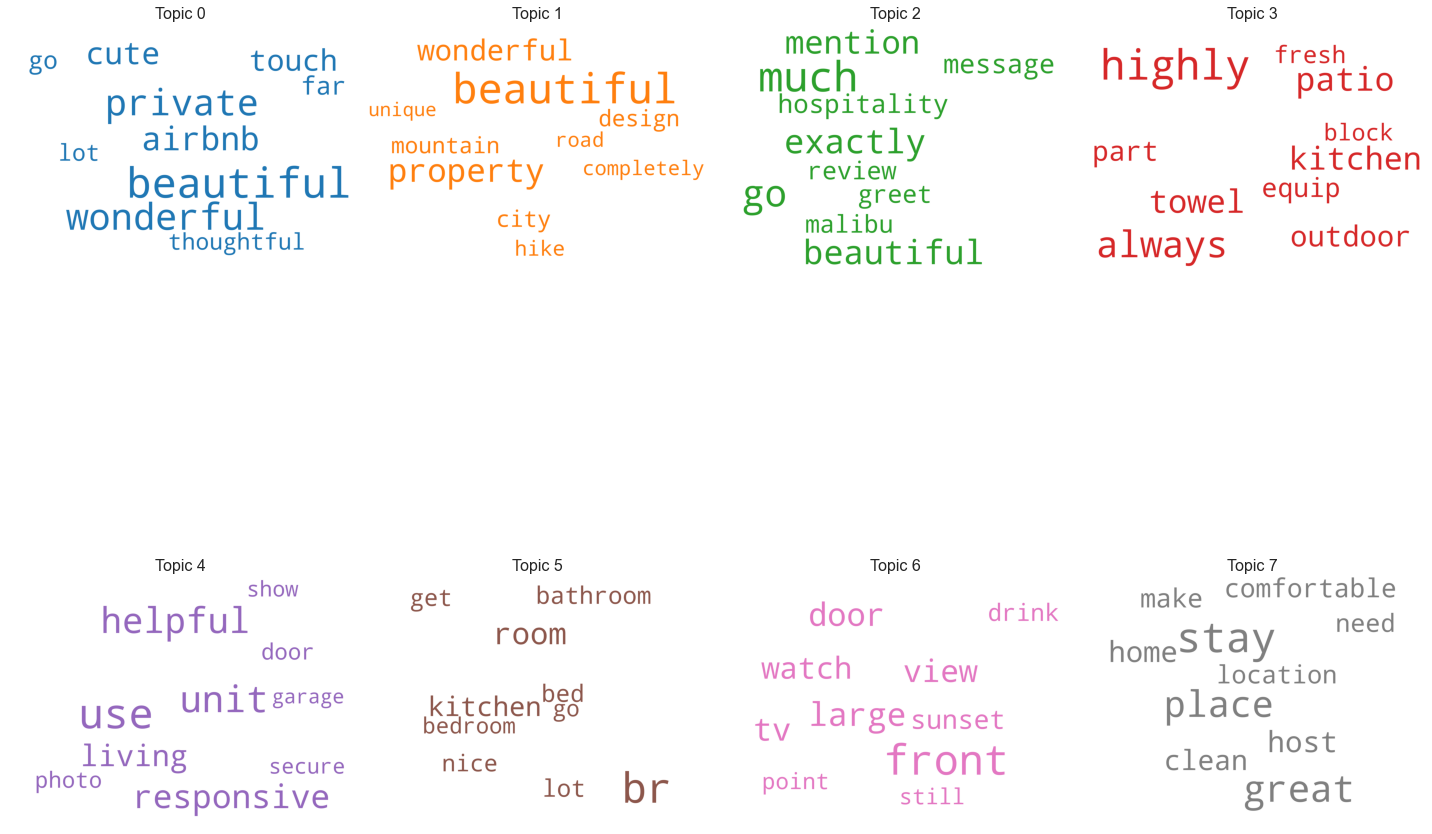

In [125]:
colors2 = [color for name, color in mcolors.TABLEAU_COLORS.items()] 

topic_clouds = WordCloud(stopwords=stop_words,background_color='white', width=2500,height=1800, max_words=25, colormap='tab10',
                  color_func=lambda *args, **kwargs: colors2[i],prefer_horizontal=1.0)


fig, axes = plt.subplots(2, 4, figsize=(20,20), sharex=True, sharey=True)
 

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    
    topic_words = dict(topics[i][1])
    topic_clouds.generate_from_frequencies(topic_words, max_font_size=300)
    
    plt.gca().imshow(topic_clouds)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

##  NMF run using 3 topics

In [126]:

nmf = NMF(n_components=3)

nmf.fit(docs)

NMF(n_components=3)

In [127]:
topic_matrix = nmf.transform(docs)

In [128]:
topic_matrix_df = pd.DataFrame(topic_matrix).add_prefix('topic_')

topic_matrix_df['comments'] = df['comments']
topic_matrix_df.head()

,topic_0,topic_1,topic_2,comments
0,0.000000,0.137571,0.049560,NaN
1,0.006512,0.116568,0.100783,NaN
2,0.202884,0.000000,0.083089,NaN
3,0.000000,0.000000,0.198091,NaN
4,0.000000,0.190883,0.001586,NaN


In [129]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=features).T.add_prefix('topic_')
word_topic_matrix_df.head()

,topic_0,topic_1,topic_2
00,0.010092,0.006408,0.006490
000,0.002203,0.001548,0.004657
0000,0.000000,0.000000,0.000485
001,0.000310,0.000000,0.000223
007,0.000201,0.000165,0.000000


# Top 10 Words from Each Topic

In [133]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [134]:
display_topics(nmf, features, 10)


Topic  0
br, just, room, like, good, airbnb, time, kitchen, space, really

Topic  1
great, place, stay, clean, location, super, nice, really, comfortable, easy

Topic  2
house, home, stay, beautiful, comfortable, like, room, time, just, clean


In [135]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)

,topic_0,topic_1,topic_2
br,29.362106,0.000000,0.000000
just,0.601227,1.744732,2.527718
room,0.581257,1.038303,3.221117
like,0.567297,1.215236,3.276480
good,0.515911,1.161447,0.987130
airbnb,0.512975,0.920346,1.783588
time,0.452537,1.452052,2.779245
kitchen,0.432185,1.025417,1.899272
space,0.427697,1.777677,2.182672
really,0.410859,2.432254,1.985493


In [136]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(10)

,topic_0,topic_1,topic_2
great,0.000000,11.316788,0.000000
place,0.298788,10.716692,0.000000
stay,0.063527,5.437558,6.040803
clean,0.129102,3.090080,2.517646
location,0.280484,3.037861,1.330528
super,0.000000,2.870233,1.114410
nice,0.404375,2.853524,1.891216
really,0.410859,2.432254,1.985493
comfortable,0.017631,2.351178,3.284388
easy,0.048875,2.115170,1.279995


In [137]:
word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(10)

,topic_0,topic_1,topic_2
house,0.115888,0.000000,8.632112
home,0.000000,0.000000,8.289455
stay,0.063527,5.437558,6.040803
beautiful,0.000000,0.787278,3.549203
comfortable,0.017631,2.351178,3.284388
like,0.567297,1.215236,3.276480
room,0.581257,1.038303,3.221117
time,0.452537,1.452052,2.779245
just,0.601227,1.744732,2.527718
clean,0.129102,3.090080,2.517646


In [138]:
def top_reviews(topic_matrix_df, topic, num_of_reviews):
    return (topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(num_of_reviews)['comments']
            .values)

def top_words(word_topic_matrix_df, topic, n_of_words):
    return (word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_of_words))[topic]

In [140]:
top_words(word_topic_matrix_df, 'topic_0', 10)

br         29.362106
just        0.601227
room        0.581257
like        0.567297
good        0.515911
airbnb      0.512975
time        0.452537
kitchen     0.432185
space       0.427697
really      0.410859
Name: topic_0, dtype: float64

In [142]:
top_words(word_topic_matrix_df, 'topic_1', 10)

great          11.316788
place          10.716692
stay            5.437558
clean           3.090080
location        3.037861
super           2.870233
nice            2.853524
really          2.432254
comfortable     2.351178
easy            2.115170
Name: topic_1, dtype: float64

In [144]:
top_words(word_topic_matrix_df, 'topic_2', 10)

house          8.632112
home           8.289455
stay           6.040803
beautiful      3.549203
comfortable    3.284388
like           3.276480
room           3.221117
time           2.779245
just           2.527718
clean          2.517646
Name: topic_2, dtype: float64

In [145]:
t1 = top_words(word_topic_matrix_df, 'topic_0', 100)
t1_10 = top_words(word_topic_matrix_df, 'topic_0', 10)

In [146]:
tl_dict = t1.to_dict()

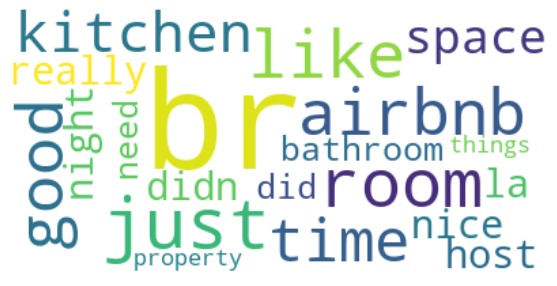

In [147]:
wc = WordCloud(background_color="white", max_words=20).generate_from_frequencies(tl_dict)
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('topic1')
plt.show()


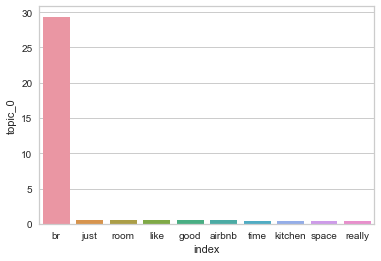

In [148]:
l_df = t1_10.to_frame()
l_df.reset_index(inplace=True)
sns.barplot(x='index', y='topic_0', data=l_df);

In [149]:
second_top = top_words(word_topic_matrix_df, 'topic_1', 100)
t2_10 = top_words(word_topic_matrix_df, 'topic_1', 10)

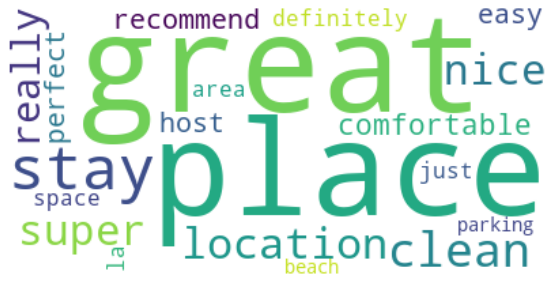

In [150]:
second_top_dict = second_top.to_dict()
wc = WordCloud(background_color="white", max_words=20).generate_from_frequencies(second_top_dict)
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('topic2')
plt.show()


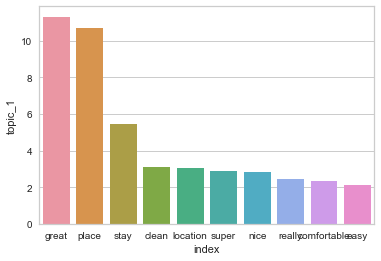

In [151]:
t2_df = t2_10.to_frame()
t2_df.reset_index(inplace=True)
sns.barplot(x='index', y='topic_1', data=t2_df);

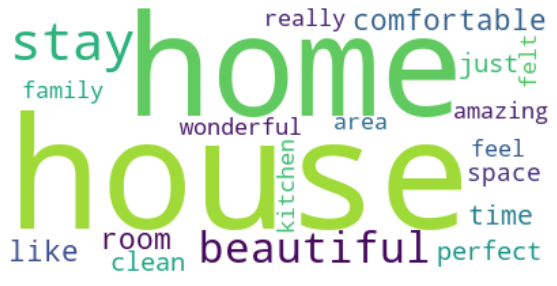

In [152]:
third_top = top_words(word_topic_matrix_df, 'topic_2', 100)
t3_10 = top_words(word_topic_matrix_df, 'topic_2', 10)


third_top_dict = third_top.to_dict()
wc = WordCloud(background_color="white", max_words=20).generate_from_frequencies(third_top_dict)
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('topic3')
plt.show()

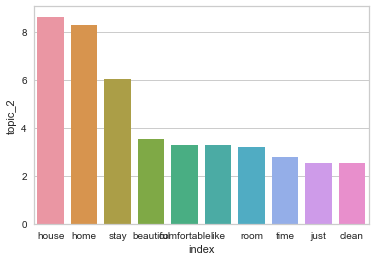

In [153]:
t3_df = t3_10.to_frame()
t3_df.reset_index(inplace=True)
sns.barplot(x='index', y='topic_2', data=t3_df);

## Build The LDA model With 5 Topics

In [154]:
lda_model_5 = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=doc_dict,num_topics=5, random_state=33,
                                           update_every=1,chunksize=15,passes=10,alpha='symmetric',iterations=100,
                                           per_word_topics=True)

pprint(lda_model_5.print_topics())

[(0,
  '0.040*"stay" + 0.038*"great" + 0.033*"place" + 0.018*"clean" + '
  '0.017*"comfortable" + 0.016*"location" + 0.016*"super" + 0.015*"host" + '
  '0.014*"perfect" + 0.014*"need"'),
 (1,
  '0.033*"home" + 0.022*"make" + 0.019*"stay" + 0.019*"feel" + 0.016*"time" + '
  '0.016*"host" + 0.015*"experience" + 0.014*"beautiful" + 0.012*"good" + '
  '0.012*"family"'),
 (2,
  '0.068*"br" + 0.043*"nice" + 0.030*"room" + 0.020*"view" + 0.015*"bathroom" '
  '+ 0.013*"large" + 0.013*"bed" + 0.012*"also" + 0.012*"bedroom" + '
  '0.010*"shower"'),
 (3,
  '0.044*"kitchen" + 0.027*"space" + 0.019*"stock" + 0.019*"light" + '
  '0.016*"towel" + 0.014*"table" + 0.013*"cook" + 0.013*"coffee" + '
  '0.012*"outdoor" + 0.012*"well"'),
 (4,
  '0.021*"apartment" + 0.019*"unit" + 0.017*"get" + 0.016*"use" + '
  '0.015*"parking" + 0.013*"thing" + 0.012*"truly" + 0.011*"find" + '
  '0.011*"night" + 0.011*"door"')]


## List of words by topic

In [155]:
topics_5 = lda_model_5.show_topics(formatted=False)

In [156]:
type(topics_5)

list

In [157]:
topics_5

[(0,
  [('stay', 0.039676283),
   ('great', 0.03841001),
   ('place', 0.03285631),
   ('clean', 0.018095925),
   ('comfortable', 0.016668301),
   ('location', 0.016376346),
   ('super', 0.015889462),
   ('host', 0.015169849),
   ('perfect', 0.014132668),
   ('need', 0.013625463)]),
 (1,
  [('home', 0.032598577),
   ('make', 0.022368578),
   ('stay', 0.019379554),
   ('feel', 0.018523961),
   ('time', 0.016083881),
   ('host', 0.015792351),
   ('experience', 0.014900381),
   ('beautiful', 0.013653974),
   ('good', 0.012464212),
   ('family', 0.011980552)]),
 (2,
  [('br', 0.06805994),
   ('nice', 0.04286138),
   ('room', 0.030114288),
   ('view', 0.020437209),
   ('bathroom', 0.014704454),
   ('large', 0.013066476),
   ('bed', 0.012620554),
   ('also', 0.012310611),
   ('bedroom', 0.011801867),
   ('shower', 0.010386321)]),
 (3,
  [('kitchen', 0.044022437),
   ('space', 0.027088702),
   ('stock', 0.019195832),
   ('light', 0.018984774),
   ('towel', 0.016119787),
   ('table', 0.01369459